In [4]:
import pandas as pd

players = pd.read_csv(r"C:\Users\79133\PMLDL_A1\data\fifa_players.csv")
players.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


I want to investigate the rating of the player based on his skills. I'll clean and delete all 100 % unnecessary data for that task, and after that will try different combinations of the training features to predict it.

In [5]:
print(players.columns)
players = players.drop(['name', 'full_name'], axis=1)


Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


Now I need to encode all categorical features and birth_date to appropriate for the model format and plot correlation matrix

In [6]:
players['birth_date'] = pd.to_datetime(players['birth_date'], errors='coerce')
players['birth_year'] = players['birth_date'].dt.year
players['birth_month'] = players['birth_date'].dt.month
players['birth_day'] = players['birth_date'].dt.day
players = players.drop('birth_date', axis=1)
# print(type(players['birth_date']))

In [7]:
print(players.columns)

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)',
       'skill_moves(1-5)', 'body_type', 'release_clause_euro', 'national_team',
       'national_rating', 'national_team_position', 'national_jersey_number',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'birth_year', 'birth_month', 'birth_day'],
      dtype='object')


In [8]:
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,94,75,96,33,28,26,1987,6,24
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,84,91,67,88,59,57,22,1992,2,14
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,88,82,87,63,67,67,1993,3,15
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,...,83,87,61,83,51,24,22,1991,6,4
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,...,24,49,33,80,91,88,87,1991,6,20


First, I encode preferred foot using OHE, because it is left or right and it seems ok for that

In [9]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder and specify columns to be encoded
encoder = OneHotEncoder(sparse_output=False, drop=None)
f_names = ['preferred_foot']
def encoding (df,f_names, encoder):
    '''
    This function performs splitting and concatanation of the parsed type_1
    column and initial dataset
    :param df : dataFrame to be concatenated
    :param feature_names : set of columns to be encoded
    :param encoder: OneHotEncoder.
    :return new_df with encoded initial columns
    '''
    # Perform OneHotEncoding for specified columns and concatanate with initial
    # df
    X_encoded = encoder.fit_transform(df[f_names])
    encoded_columns = encoder.get_feature_names_out(f_names)
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)
    new_df = pd.concat([df.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)
    new_df.drop(f_names, axis=1, inplace=True)
    return new_df

# Call encoding function
players = encoding(players,f_names, encoder)
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [10]:
print(players.columns)

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
       'birth_year', 'birth_month', 'birth_day', 'preferred_foot_Left',
       'preferred_foot_Right'],
      dtype='object')


Now, I will keep only one position as main for the player, the first one is the player's favorite and the most effective position, so, I'll remove all others

In [11]:
players['positions'] = players['positions'].apply(lambda x: x.split(',')[0] if ',' in x else x) 
# players['national_team_position'] = players['national_team_position'].apply(lambda x: x.split(',')[0] if ',' in x else x) 
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,CF,Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,CAM,Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,CM,France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,LW,Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


Now I want to investigate nan values and replace it somehow or just remove these players.

In [12]:
print(players.isnull().sum())

age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                              0
dribbling                            0
curve                                0
freekick_accuracy        

For those who don't have their price, I'll delete this guys, because they are really bad players, for releause_clause I'll set 0, because it's just mean that this man doesn't have such option in his contract, for issues with national team: national team = nationality, rating - mean for other national teams / 2, because if it's not stated then it should be not really strong team, rating - average rating, team_position - position, jersey_number - drop column

In [13]:
# rows_with_nan = players[players.isna().any(axis=1)]
# rows_with_nan.head()
players = players.drop('national_jersey_number', axis=1)
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,CF,Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,CAM,Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,CM,France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,LW,Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [14]:
players['national_team_position'] = players['national_team_position'].fillna(players['positions'])
players['release_clause_euro'] = players['release_clause_euro'].fillna(0)
players['national_team'] = players['national_team'].fillna(players['nationality'])
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,CF,Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,CAM,Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,CM,France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,LW,Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [15]:
players = players.dropna(subset=['value_euro', 'wage_euro'])

In [16]:
print(players.isnull().sum())

age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                           0
wage_euro                            0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro                  0
national_team                        0
national_rating                  16842
national_team_position               0
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing                        0
volleys                              0
dribbling                            0
curve                                0
freekick_accuracy                    0
long_passing             

In [17]:
import numpy as np
mean_national_rating = np.mean(players['national_rating']) / 2
# print(mean_national_rating)
players['national_rating'] = players['national_rating'].fillna(mean_national_rating)

In [18]:
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,CF,Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,CAM,Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,CM,France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,LW,Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


Now, let's encode positions and nationality

In [19]:
unique_positions = players['positions'].unique()
unique_positions_national_team = players['national_team_position'].unique()
print(unique_positions)
print(unique_positions_national_team)

['CF' 'CAM' 'CM' 'LW' 'CB' 'RW' 'ST' 'GK' 'CDM' 'LB' 'RM' 'LM' 'RB' 'LWB'
 'RWB']
['RF' 'CAM' 'RDM' 'LW' 'CB' 'LCB' 'RM' 'SUB' 'GK' 'LS' 'CDM' 'LF' 'ST'
 'CM' 'LB' 'RCB' 'LAM' 'RW' 'LCM' 'LM' 'RB' 'RCM' 'LDM' 'CF' 'RWB' 'LWB'
 'RS' 'RES' 'RAM']


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
players['positions'] = label_encoder.fit_transform(players['positions'])
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,3,Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,0,Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,4,France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,8,Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,1,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [21]:
players['national_team_position'] = label_encoder.fit_transform(players['national_team_position'])
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,3,Argentina,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,0,Denmark,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,4,France,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,8,Italy,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,1,Senegal,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [22]:
unique_nationality = players['nationality'].unique()
unique_national_team = players['national_team'].unique()
print(unique_nationality)
print(unique_national_team)

['Argentina' 'Denmark' 'France' 'Italy' 'Senegal' 'Netherlands' 'Germany'
 'Uruguay' 'Spain' 'Belgium' 'Egypt' 'Slovakia' 'Brazil' 'Croatia'
 'Costa Rica' 'Colombia' 'Morocco' 'Portugal' 'Sweden'
 'Bosnia Herzegovina' 'Mexico' 'England' 'Austria' 'Iceland' 'Hungary'
 'Wales' 'Ukraine' 'Central African Rep.' 'Serbia' 'Ivory Coast'
 'Cameroon' 'Paraguay' 'Australia' 'Algeria' 'Romania' 'Russia' 'Israel'
 'Switzerland' 'Chile' 'Tunisia' 'Turkey' 'Nigeria' 'Peru' 'Norway'
 'Greece' 'United States' 'Venezuela' 'Iran' 'Equatorial Guinea'
 'Cape Verde' 'Tanzania' 'Scotland' 'China PR' 'Kosovo' 'Montenegro'
 'Canada' 'Madagascar' 'Mali' 'Ghana' 'Guinea' 'Poland' 'Cuba'
 'Northern Ireland' 'Japan' 'New Zealand' 'Republic of Ireland' 'Ecuador'
 'Burkina Faso' 'Czech Republic' 'Slovenia' 'Belarus' 'Gabon'
 'FYR Macedonia' 'Curacao' 'DR Congo' 'Honduras' 'Sierra Leone'
 'Guinea Bissau' 'Saudi Arabia' 'Fiji' 'Korea Republic' 'Zambia' 'Syria'
 'Armenia' 'Georgia' 'Angola' 'South Africa' 'Zimbabwe' '

Surprisingly, it happens that in players national team stated just the club! I'll replace it on the nationality of the player.

In [23]:
players['national_team'] = np.where(players['nationality'] != players['national_team'], players['nationality'], players['national_team'])

In [24]:
unique_national_team = players['national_team'].unique()
print(unique_national_team)

['Argentina' 'Denmark' 'France' 'Italy' 'Senegal' 'Netherlands' 'Germany'
 'Uruguay' 'Spain' 'Belgium' 'Egypt' 'Slovakia' 'Brazil' 'Croatia'
 'Costa Rica' 'Colombia' 'Morocco' 'Portugal' 'Sweden'
 'Bosnia Herzegovina' 'Mexico' 'England' 'Austria' 'Iceland' 'Hungary'
 'Wales' 'Ukraine' 'Central African Rep.' 'Serbia' 'Ivory Coast'
 'Cameroon' 'Paraguay' 'Australia' 'Algeria' 'Romania' 'Russia' 'Israel'
 'Switzerland' 'Chile' 'Tunisia' 'Turkey' 'Nigeria' 'Peru' 'Norway'
 'Greece' 'United States' 'Venezuela' 'Iran' 'Equatorial Guinea'
 'Cape Verde' 'Tanzania' 'Scotland' 'China PR' 'Kosovo' 'Montenegro'
 'Canada' 'Madagascar' 'Mali' 'Ghana' 'Guinea' 'Poland' 'Cuba'
 'Northern Ireland' 'Japan' 'New Zealand' 'Republic of Ireland' 'Ecuador'
 'Burkina Faso' 'Czech Republic' 'Slovenia' 'Belarus' 'Gabon'
 'FYR Macedonia' 'Curacao' 'DR Congo' 'Honduras' 'Sierra Leone'
 'Guinea Bissau' 'Saudi Arabia' 'Fiji' 'Korea Republic' 'Zambia' 'Syria'
 'Armenia' 'Georgia' 'Angola' 'South Africa' 'Zimbabwe' '

Now we can encode

In [25]:
players['nationality'] = label_encoder.fit_transform(players['nationality'])
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,3,6,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,0,39,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,4,53,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,8,75,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,1,125,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [26]:
players['national_team'] = label_encoder.fit_transform(players['national_team'])
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,3,6,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,0,39,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,4,53,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,8,75,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,1,125,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


In [27]:
print(players['body_type'].unique())

['Messi' 'Lean' 'Normal' 'Stocky' 'Courtois' 'PLAYER_BODY_TYPE_25'
 'Akinfenwa' 'Shaqiri' 'Neymar' 'C. Ronaldo']


In [28]:
players['body_type'] = label_encoder.fit_transform(players['body_type'])
players.head()

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year,birth_month,birth_day,preferred_foot_Left,preferred_foot_Right
0,31,170.18,72.1,3,6,94,94,110500000.0,565000.0,5,...,75,96,33,28,26,1987,6,24,1.0,0.0
1,27,154.94,76.2,0,39,88,89,69500000.0,205000.0,3,...,67,88,59,57,22,1992,2,14,0.0,1.0
2,25,190.50,83.9,4,53,88,91,73000000.0,255000.0,4,...,82,87,63,67,67,1993,3,15,0.0,1.0
3,27,162.56,59.0,8,75,88,88,62000000.0,165000.0,3,...,61,83,51,24,22,1991,6,4,0.0,1.0
4,27,187.96,88.9,1,125,88,91,60000000.0,135000.0,3,...,33,80,91,88,87,1991,6,20,0.0,1.0


Now I finally can build correlation matrix!

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = players.corr()
# correlation_matrix
# Plot the correlation matrix


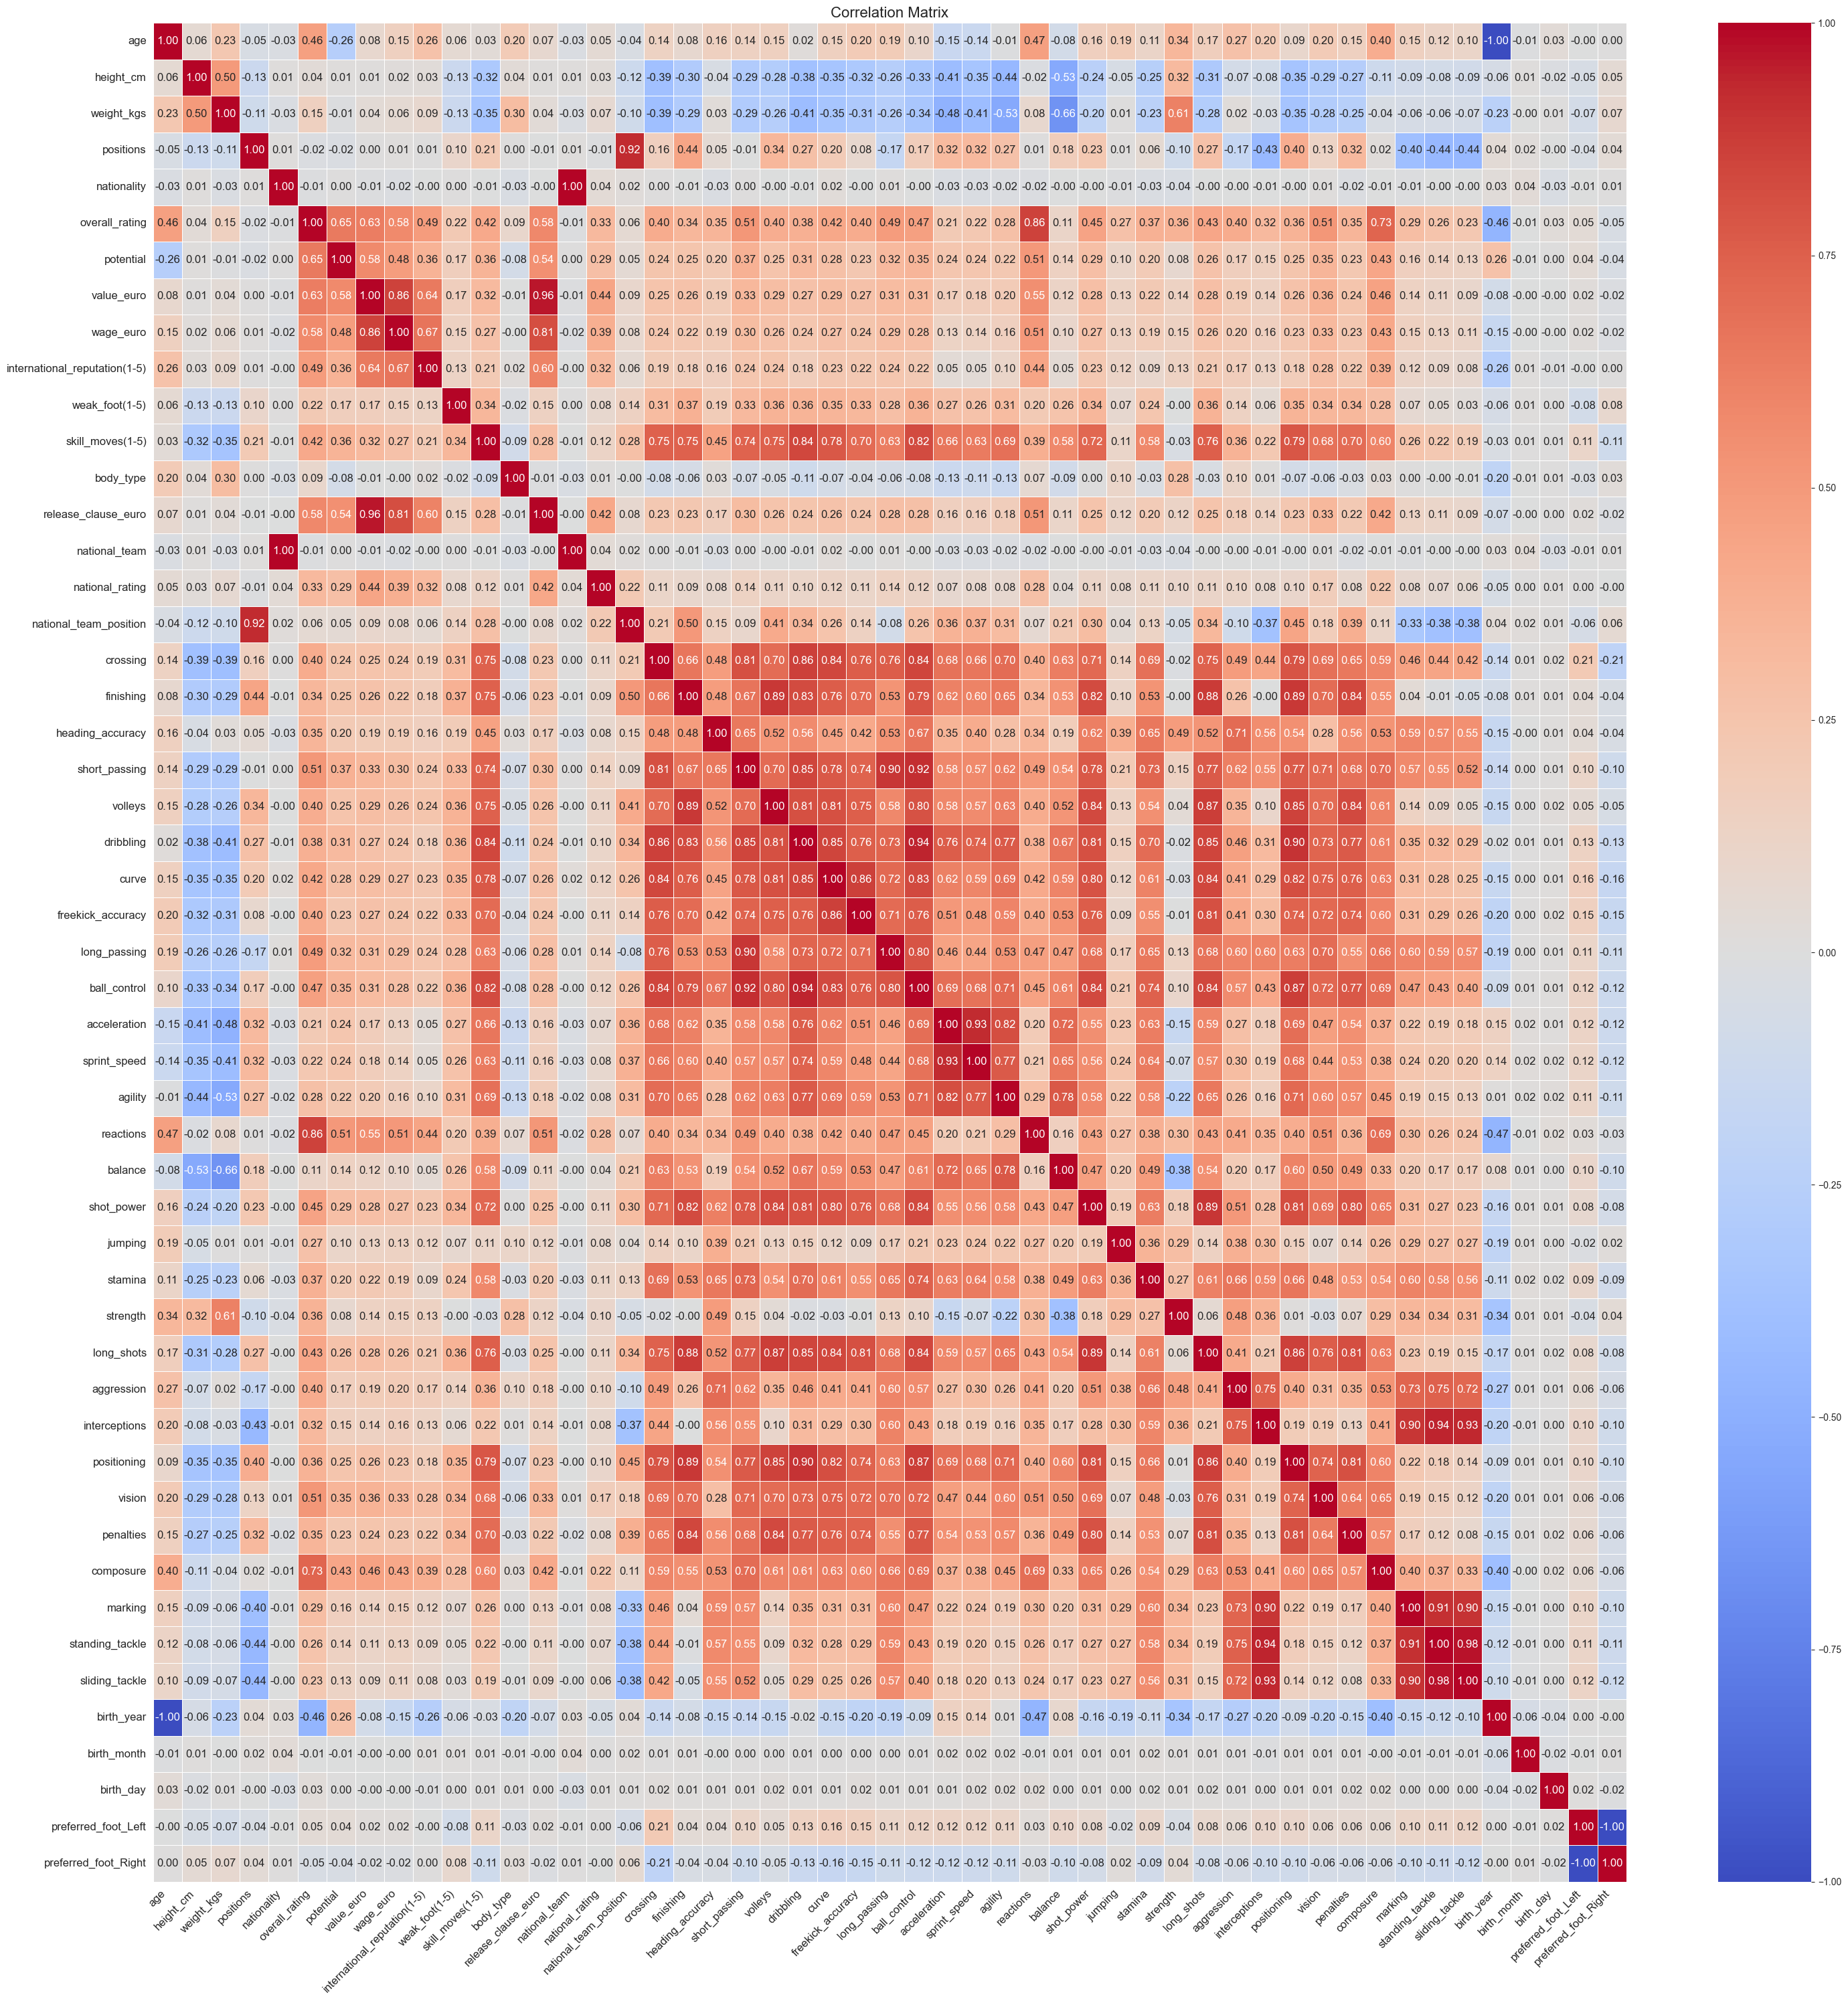

In [30]:
plt.figure(figsize=(30, 30))  # Increase the figure size
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
                      annot_kws={"size": 12})  # Adjust font size for annotations

# Rotate x and y axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Add titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

I'll drop columns which influencing -0.05 < x < 0.05 on the overall_rating. They provide very insignificant influence on the target variable

In [31]:
print(correlation_matrix['overall_rating'].sort_values(ascending=False))

overall_rating                   1.000000
reactions                        0.857014
composure                        0.731415
potential                        0.646276
value_euro                       0.630928
release_clause_euro              0.583616
wage_euro                        0.577478
vision                           0.508294
short_passing                    0.508115
international_reputation(1-5)    0.491132
long_passing                     0.490830
ball_control                     0.465967
age                              0.464441
shot_power                       0.446920
long_shots                       0.430491
curve                            0.424808
skill_moves(1-5)                 0.419450
freekick_accuracy                0.401812
crossing                         0.399181
aggression                       0.398530
volleys                          0.397413
dribbling                        0.379939
stamina                          0.370494
positioning                      0

I'll drop these columns: body_type, national_team_position, preferred_foot_left, height, birth_day, birth_month, national_team, nationality, positions, preferred_foot_right. I'm surprised that position doesnn't influence 

In [32]:
players = players.drop(['body_type', 'national_team_position','preferred_foot_Left','height_cm','birth_day','birth_month',
                        'national_team', 'nationality', 'positions', 'preferred_foot_Right'], axis=1)
players.head()

,age,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,...,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,birth_year
0,31,72.1,94,94,110500000.0,565000.0,5,4,4,226500000.0,...,48,22,94,94,75,96,33,28,26,1987
1,27,76.2,88,89,69500000.0,205000.0,3,5,4,133800000.0,...,46,56,84,91,67,88,59,57,22,1992
2,25,83.9,88,91,73000000.0,255000.0,4,4,5,144200000.0,...,78,64,82,88,82,87,63,67,67,1993
3,27,59.0,88,88,62000000.0,165000.0,3,4,4,105400000.0,...,34,26,83,87,61,83,51,24,22,1991
4,27,88.9,88,91,60000000.0,135000.0,3,3,2,106500000.0,...,87,88,24,49,33,80,91,88,87,1991


In [33]:
target = players['overall_rating']
train_features = players.drop(['overall_rating', 'birth_year'], axis=1)
target.head()

0    94
1    88
2    88
3    88
4    88
Name: overall_rating, dtype: int64

Also, it's better to scale data before fitting the model

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['value_euro', 'wage_euro', 'release_clause_euro']
train_features[features_to_scale] = scaler.fit_transform(train_features[features_to_scale])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(train_features, target, test_size=0.1)

# model = LinearRegression()
# model = Ridge()
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
y_pred = model.predict(X_test)
# convert to integers
y_pred = np.round(y_pred)
# y_pred = y_pred.astype(int)

In [49]:
print(f"r2: {r2_score(y_test, y_pred)}")


r2: 0.9962929988417895


In [50]:
import pickle
model_pkl_file = "FIFA_rating_prediction.pkl"
with open(model_pkl_file, 'wb') as f:
    pickle.dump(model, f)

In [53]:
print(max(y_pred))

89.0
